### Tasa de recambio en un auditorio y monitoreo de $CO_2$ en distintos espacios
**Ubicación**: Edificio uis salud, salon ---

**Objetivos:** 
- Realizar la medición de la tasa de recambio de aire apartir de la medición de  $CO_2$.
- Monitorear el nivel de $CO_2$ en diferentes espacios de trabajo.

**Sensores:** durante esta prueba se usaron los sensores *Aranet4* , *ERIS_S8_1*, *ERIS_S8_2* y *ERIS_SCD30_1*.

*NOTA:* Se utilizaron 3 kilos de hielo seco, para generar el $CO_2$. (COP 27.000)

In [1]:
import Air_flow.calib as cal
import Air_flow.ach as ach
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
from matplotlib import cm, colors

### Validación
Se hace la validación que todos los sensores miden *igual* antes de realizar los demás experimentos. En esta etapa se uso la cabina de mando del auditorio, colocando todos los sensores juntos y amentando el nivel de $CO_2$, a puerta cerrada

In [2]:
start = '2021-03-08 09:22:00'
end = '2021-03-08 10:10:00'
paramt1, data1 = cal._import(['../Datos/aranet2.csv','../Datos/ERIS_S8_1.csv'],start,end)
paramt2, data2 = cal._import(['../Datos/aranet2.csv','../Datos/ERIS_S8_2.csv'],start,end)
paramt3, data3 = cal._import(['../Datos/aranet2.csv','../Datos/ERIS_SCD30_1.csv'],start,end)

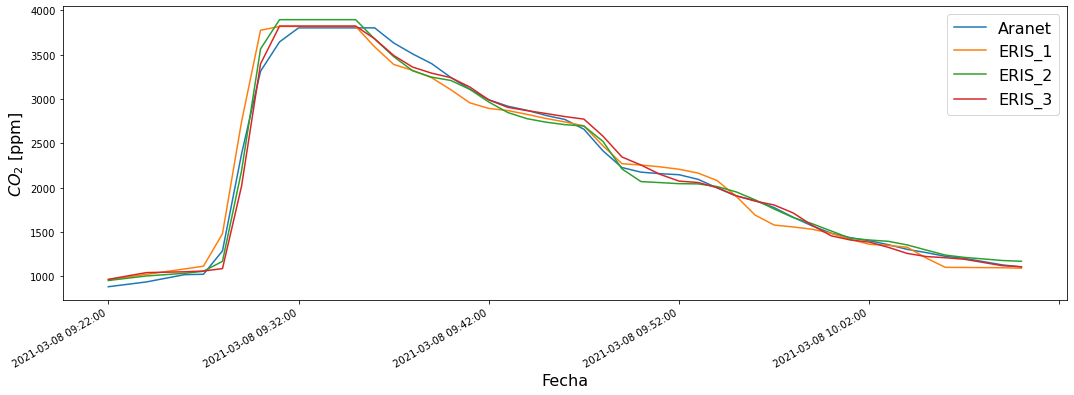

In [3]:
plt.figure(figsize = (18,6))
data1.CO2_ar.plot(label = 'Aranet' )
data1.CO2_cal_1.plot(label = 'ERIS_1')
data2.CO2_cal_1.plot(label = 'ERIS_2')
data3.CO2_cal_1.plot(label = 'ERIS_3')
plt.gcf().autofmt_xdate()
plt.ylabel('$CO_2$ [ppm]', fontsize = 16)
plt.xlabel('Fecha', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

### Medición de la tasa de recambio de aire

##### Aranet

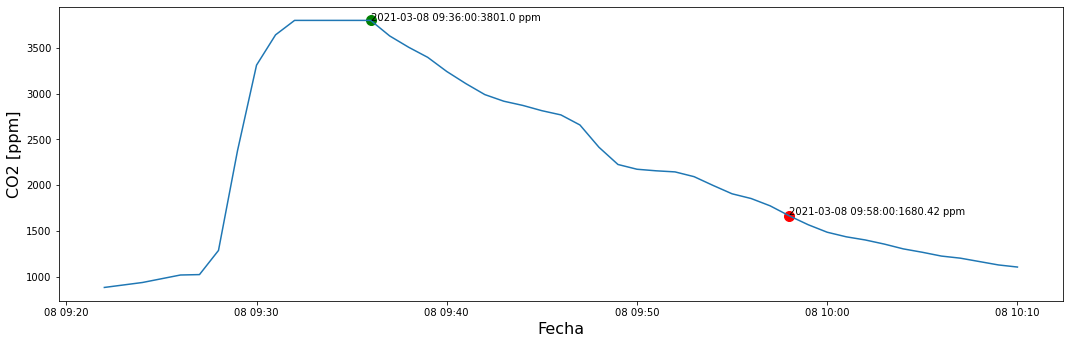

Calidad: Baja , ACH: 2.711597109119637


In [4]:
ach.ACH(data1,0,'2021-03-08 09:22:00', '2021-03-08 09:36:00' ,'2021-03-08 10:10:00')

##### ERIS_S8_1

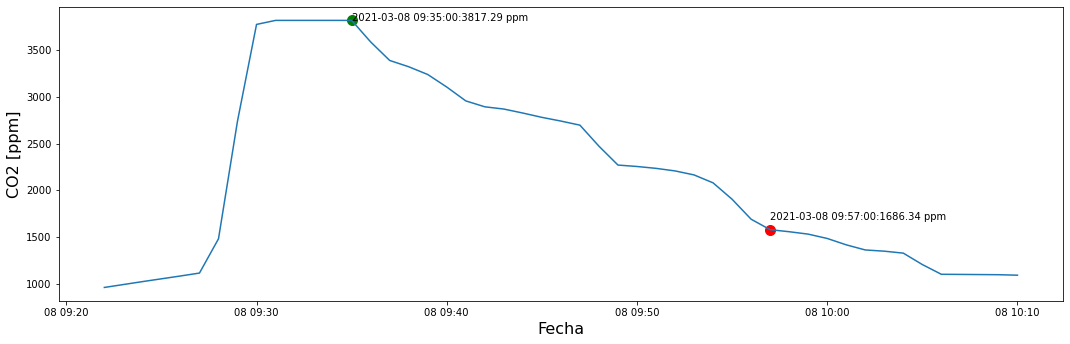

Calidad: Baja , ACH: 2.711834685019565


In [5]:
ach.ACH(data1,2,'2021-03-08 09:22:00', '2021-03-08 09:35:00' ,'2021-03-08 10:10:00')

##### ERIS_S8_2

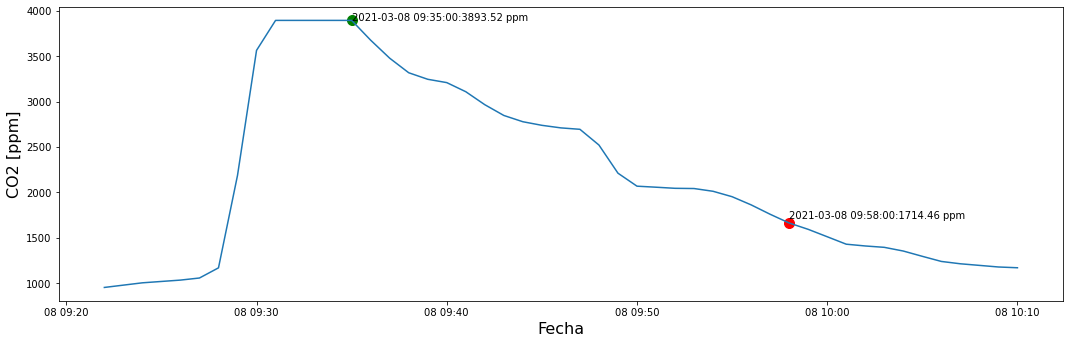

Calidad: Baja , ACH: 2.5940965900240216


In [6]:
ach.ACH(data2,2,'2021-03-08 09:22:00', '2021-03-08 09:35:00' ,'2021-03-08 10:10:00')

##### ERIS_SCD30_1

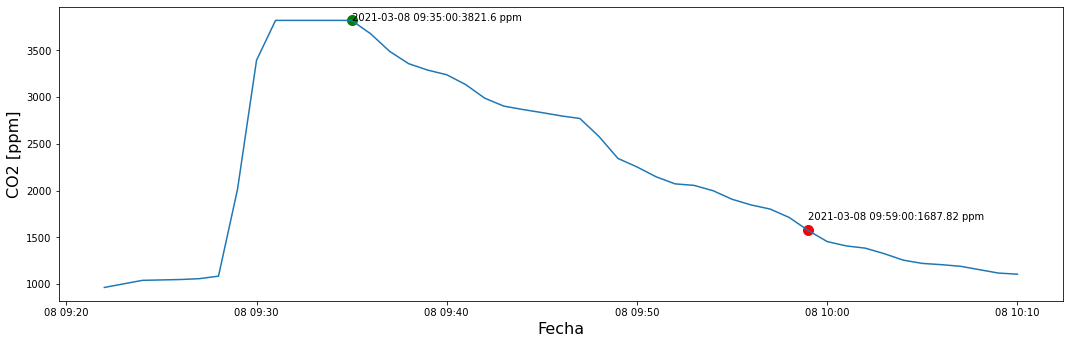

Calidad: Baja , ACH: 2.4860757992371685


In [7]:
ach.ACH(data3,2,'2021-03-08 09:22:00', '2021-03-08 09:35:00' ,'2021-03-08 10:10:00')

Evidentemente las tasas de recambio de aire medidas con cada uno de los sensores es muy similar entre si, salvo pequeñas variaciones propias de la frecuencia de muestreo y la respuesta de cada sensor. Estas no son superiores a  0.2 lo cual no representa una variación significativa para el fenomeno estudiado.

### Medición de la tasa de recambio de aire en el auditorio
Se realizó la prueba de recambio de aire en el auditorio para dos situaciones, a puerta cerrada con aire y sin aire acondicionado encendido. Ademas es clave mencionar que el *extractor* estaba más serca al *Aranet4*, este tado es importante para la segunda situación.

In [8]:
start = '2021-03-08 11:30:00'
end = '2021-03-08 14:00:00'
paramt1, data1 = cal._import(['../Datos/aranet2.csv','../Datos/ERIS_S8_1.csv'],start,end)
paramt2, data2 = cal._import(['../Datos/aranet2.csv','../Datos/ERIS_S8_2.csv'],start,end)


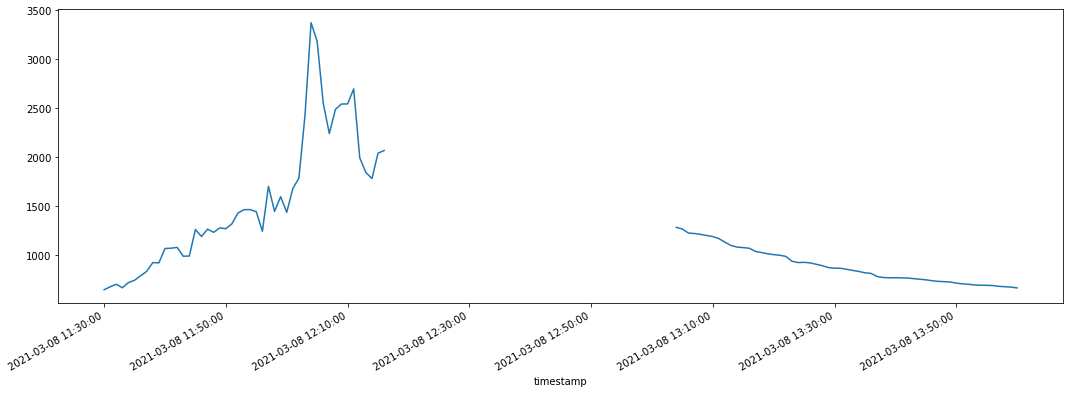

In [9]:
data3 = pd.read_csv('../Datos/ERIS_SCD30_1.csv')
data3.index = pd.DatetimeIndex(data3.timestamp) #-  pd.Timedelta(minutes = 2)
data3 = data3.resample('1T').mean()
data3.index = data3.index.strftime('%Y-%m-%d %H:%M:%S')
data3 = ach.cutdata([data3], start, end)[0]
plt.figure(figsize=(18,6))
data3.CO2.plot()
plt.gcf().autofmt_xdate()

#### Situación 1: Aire apagado

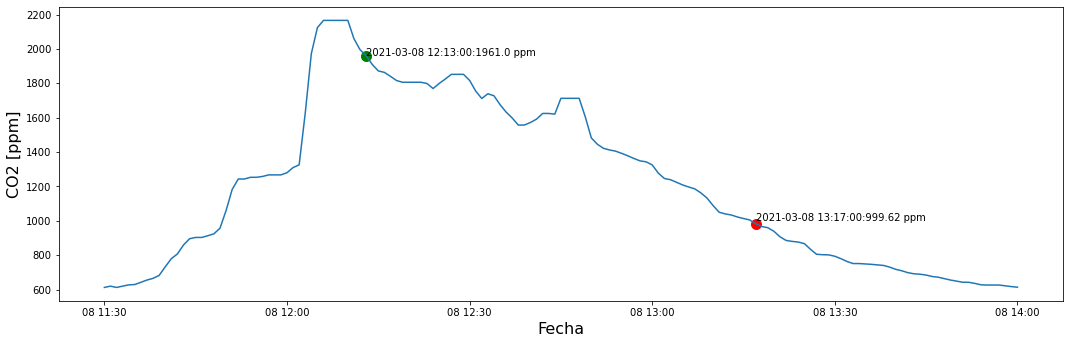

Calidad: Baja , ACH: 0.9321115062598753


In [10]:
# Aranet4
ach.ACH(data1,0,'2021-03-08 11:30:00', '2021-03-08 12:13:00' ,'2021-03-08 14:00:00')

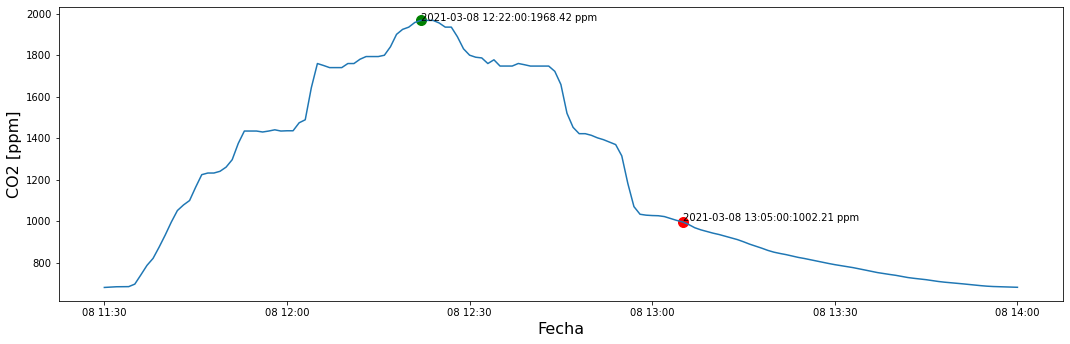

Calidad: Baja , ACH: 1.3877108148180506


In [11]:
# ERIS_S8_1
ach.ACH(data1,2,'2021-03-08 11:30:00', '2021-03-08 12:13:00' ,'2021-03-08 14:00:00')

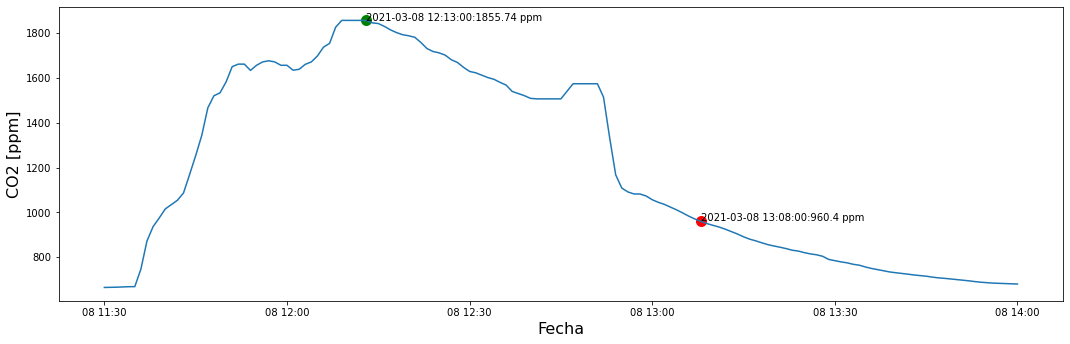

Calidad: Baja , ACH: 1.0852083688379448


In [12]:
# ERIS_S8_2
ach.ACH(data2,2,'2021-03-08 11:30:00', '2021-03-08 12:13:00' ,'2021-03-08 14:00:00')

In [10]:
# ERIS_SCD30_1
c_start = 1843
c_ambient = 435
c_end = c_ambient + 0.37 * (c_start - c_ambient)

t_start = pd.DatetimeIndex(['2021-03-08 12:13:00'] )
t_end = pd.DatetimeIndex(['2021-03-04 13:07:00'] )
ACH =  (-1 * np.log((c_end-c_ambient)/(c_start - c_ambient)))/((t_end -t_start).seconds / 3600)
print('ACH:',ACH[0])

ACH: 1.1047247481598519


#### Situación 2: Aire encendido

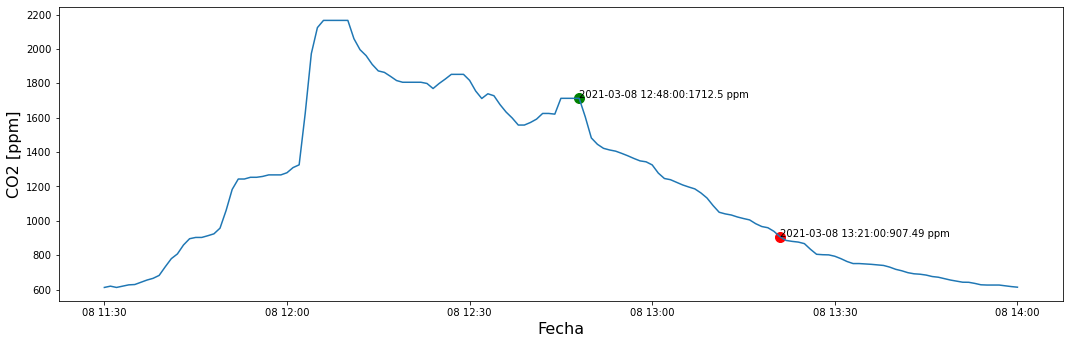

Calidad: Baja , ACH: 1.8084431625257944


In [13]:
# Aranet4
ach.ACH(data1,0,'2021-03-08 11:30:00', '2021-03-08 12:48:00' ,'2021-03-08 14:00:00')

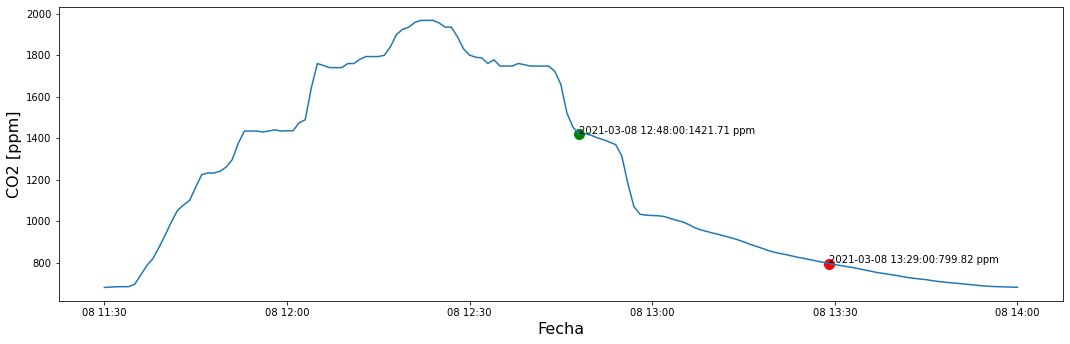

Calidad: Baja , ACH: 1.456059978657573


In [14]:
# ERIS_S8_1
ach.ACH(data1,2,'2021-03-08 11:30:00', '2021-03-08 12:48:00' ,'2021-03-08 14:00:00')

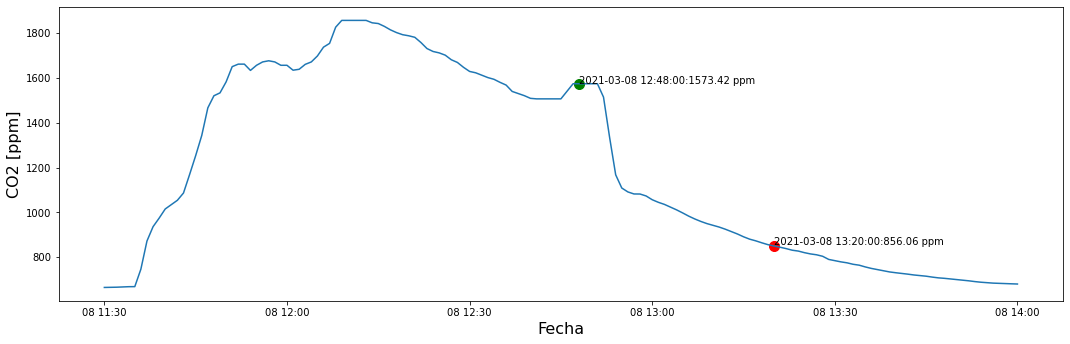

Calidad: Baja , ACH: 1.8649226454640357


In [15]:
# ERIS_S8_2
ach.ACH(data2,2,'2021-03-08 11:30:00', '2021-03-08 12:48:00' ,'2021-03-08 14:00:00')

In [12]:
# ERIS_SCD30_1
c_start = 1573
c_ambient = 435
c_end = c_ambient + 0.37 * (c_start - c_ambient)

t_start = pd.DatetimeIndex(['2021-03-08 12:48:00'] )
t_end = pd.DatetimeIndex(['2021-03-04 13:27:00'] )
ACH =  (-1 * np.log((c_end-c_ambient)/(c_start - c_ambient)))/((t_end -t_start).seconds / 3600)
print('ACH:',ACH[0])

ACH: 1.5296188820674879


|Sensor |Aire apagado | Aire encendido |
|------|-------------|----------------|
| Aranet4 | 0.93     |  1.8           |
| ERIS_S8_1 |1.38    |  1.45          |
| ERIS_S8_2  | 1.08  | 1.86           |
| ERIS_SCD30_1 | 1.1 | 1.52           |

Se evidencia que para cuando el aire del auditorio esta apagado la tasa de renovación de aire, es muy cercana al 1, lo cual segun las recomendaciones de Harvard una calidad muy baja. Ahora bien cuando se enciende el aire, la tasa de renovación aumenta un poco, aunque sigue estanto en un nivel critico. 

Cabe resaltar que el sensor Aranet y ERRIS_S8_2 estuvieron más cerca del estractor, por lo cual la tasa de renovación es mayor en estos dos puntos respectivamente.

### Comportamiento del $CO_2$ a lo largo de la prueba

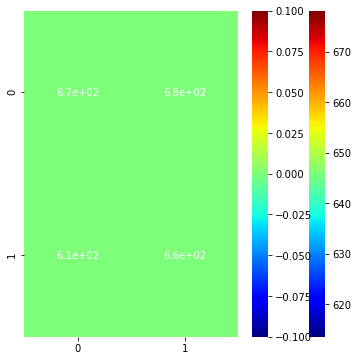

In [16]:
fig = plt.figure(figsize = (6,6))
#data = np.random.rand(2, 2)
#sns.heatmap(data, vmax=5000, square=True)

def init():
    sns.heatmap(np.zeros((2, 2)), square=False,  cmap=cm.jet)

def animate(i):
    fig.clear()
    data = data = [[data2.CO2[i],data1.CO2[i]],[data1.CO2_ar[i],data3.CO2[i]]]
    sns.heatmap(data, square=False, annot = True, cmap=cm.jet)
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(data1.CO2),interval = 100 ,repeat = False)
HTML(anim.to_html5_video())

### Medición de $CO_2$ para diferentes espacios

In [17]:
datar = pd.read_csv('../Datos/aranet2.csv')
    
datar.columns = ['Time', 'CO2_ar', 'T', 'H', 'P']
    
datar.index = pd.DatetimeIndex(datar['Time'], dayfirst = True )
datar = datar.drop("Time",axis=1)
datar = cal.clean_nan(datar,'CO2_ar')
datar.CO2_ar = pd.to_numeric(datar.CO2_ar)
datar = datar.resample('1T').mean()
datar.index = datar.index.strftime('%Y-%m-%d %H:%M:%S')
datar1= cal.cutdata([datar.CO2_ar], '2021-03-08 10:26:00','2021-03-08 10:40:00')[0]
datar2= cal.cutdata([datar.CO2_ar], '2021-03-08 10:48:00','2021-03-08 11:00:00')[0]


In [18]:
print('Lugar: Lab Microbiología')
print('Inicio: 2021-03-08 10:26:00')
print('Final: 2021-03-08 10:40:00')
print('CO2:', round(datar1.mean(),2), ' ppm')

Lugar: Lab Microbiología
Inicio: 2021-03-08 10:26:00
Final: 2021-03-08 10:40:00
CO2: 517.73  ppm


In [19]:
print('Lugar: Decanato')
print('Inicio: 2021-03-08 10:48:00')
print('Final: 2021-03-08 11:00:00')
print('CO2:', round(datar2.mean(),2), ' ppm')

Lugar: Decanato
Inicio: 2021-03-08 10:48:00
Final: 2021-03-08 11:00:00
CO2: 476.15  ppm


In [20]:
data1 = pd.read_csv('../Datos/ERIS_S8_1.csv')
data1.index = pd.DatetimeIndex(data1.timestamp) #-  pd.Timedelta(minutes = 2)
data1 = data1.resample('1T').mean()
data1.index = data1.index.strftime('%Y-%m-%d %H:%M:%S')
data1 = ach.cutdata([data1], '2021-03-08 10:32:00', '2021-03-08 10:50:00')[0]

In [21]:
print('Lugar: Escuela nutricion')
print('Inicio: 2021-03-08 10:32:00')
print('Final: 2021-03-08 10:50:00')
print('CO2:', round(data1.CO2.mean(),2), ' ppm')

Lugar: Escuela nutricion
Inicio: 2021-03-08 10:32:00
Final: 2021-03-08 10:50:00
CO2: 493.44  ppm


In [22]:
data2 = pd.read_csv('../Datos/ERIS_S8_2.csv')
data2.index = pd.DatetimeIndex(data2.timestamp) #-  pd.Timedelta(minutes = 2)
data2 = data2.resample('1T').mean()
data2.index = data2.index.strftime('%Y-%m-%d %H:%M:%S')
data2 = ach.cutdata([data2], '2021-03-08 10:40:00', '2021-03-08 10:52:00')[0]

In [23]:
print('Lugar: Recepción patología')
print('Inicio: 2021-03-08 10:40:00')
print('Final: 2021-03-08 10:52:00')
print('CO2:', round(data2.CO2.mean(),2), ' ppm')

Lugar: Recepción patología
Inicio: 2021-03-08 10:40:00
Final: 2021-03-08 10:52:00
CO2: 564.45  ppm
